In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone --branch X20_analysis https://github.com/ShulzhenkoPetr/PSC-Pattern-Classification.git

Cloning into 'PSC-Pattern-Classification'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 241 (delta 22), reused 38 (delta 9), pack-reused 181
Receiving objects: 100% (241/241), 3.31 MiB | 10.37 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [ ]:
!unzip '/content/gdrive/MyDrive/Data /marketdata.db.zip' -d '/content/PSC-Pattern-Classification/'

Archive:  /content/gdrive/MyDrive/Data /marketdata.db.zip
  inflating: /content/PSC-Pattern-Classification/marketdata.db  
  inflating: /content/PSC-Pattern-Classification/__MACOSX/._marketdata.db  


In [ ]:
%cd PSC-Pattern-Classification/

/content/PSC-Pattern-Classification


In [ ]:
!pip install -r requirements.txt

In [ ]:
!nvidia-smi 

Tue Apr 25 15:55:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Spread

Formula X20:

In [ ]:
for spr, t in zip([0.001, 0.01, 0.1, 0.5], [5]*4):                         
  print(f"--------{spr}------------")
  for i in range(t):                
    print(f"---------computing {i} time--------")                 
    %run main.py --index_type NONFOREX --index FRA40 --nb_clusters {500} --spread {spr}

Form a DataFrame with columns:

In [ ]:
import pandas as pd 

data_fra = pd.read_csv('/content/gdrive/MyDrive/Data /spread_curve.csv', header=None)

columns = ["SYMBOL", "START_DATE", "END_DATE", "DATES", "SPREAD","LONG/SHORT","SUM_LONG","SUM_SHORT","MEAN_LONG","MEAN_SHORT","MAX_PIPS_LONG","MIN_PIPS_LONG","MEAN_PIPS_LONG","MAX_PIPS_SHORT","MIN_PIPS_SHORT","MEAN_PIPS_SHORT",  "N_CLUSTERS", "PREDICTIVE_CLUSTERS", "RETURN", "MIN_PIPS", "N_TRADE", "WIN_RATE", "MAX_DRAWDOWN", "SHARPE", "PATH", "BENCHMARK_RETURN"]
data_fra.columns = columns
data_fra.to_csv('/content/gdrive/MyDrive/Data /spread_curve.csv', index=False)

####Analysis:

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

data_spread_fra = pd.read_csv('/content/gdrive/MyDrive/Data /spread_curve.csv')

fig = go.Figure()

fig.add_trace(go.Scatter(x=data_spread_fra["SPREAD"].unique(),
                            y=data_spread_fra.groupby("SPREAD")["MEAN_LONG"].mean(),
                            mode="lines",
                            line=go.scatter.Line(),
                            name="Long"))

fig.add_trace(go.Scatter(x=data_spread_fra["SPREAD"].unique(),
                            y=data_spread_fra.groupby("SPREAD")["MEAN_SHORT"].mean(),
                            mode="lines",
                            line=go.scatter.Line(),
                            name="Short"))


fig.update_layout(
    title="Dependence of average equity change on spread",
    xaxis_title="Spread",
    yaxis_title="Averaged mean PnL")

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_spread_fra["SPREAD"].unique(),
                            y=data_spread_fra.groupby("SPREAD")["MEAN_PIPS_LONG"].mean(),
                            mode="lines",
                            line=go.scatter.Line(),
                            name="Long"))

fig.add_trace(go.Scatter(x=data_spread_fra["SPREAD"].unique(),
                            y=data_spread_fra.groupby("SPREAD")["MEAN_PIPS_SHORT"].mean(),
                            mode="lines",
                            line=go.scatter.Line(),
                            name="Short"))

fig.update_layout(
    title="Dependence of average PIP on spread",
    xaxis_title="Spread",
    yaxis_title="Mean PIP")

fig.show()

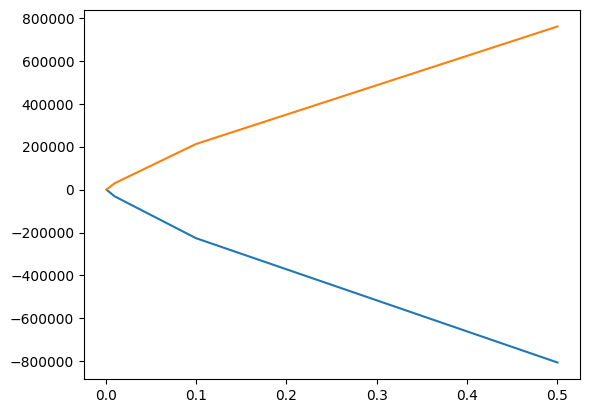

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

data_spread_fra = pd.read_csv('/content/gdrive/MyDrive/Data /spread_curve.csv')

plt.plot(data_spread_fra["SPREAD"].unique(), data_spread_fra.groupby("SPREAD")["SUM_LONG"].mean());
plt.plot(data_spread_fra["SPREAD"].unique(), data_spread_fra.groupby("SPREAD")["SUM_SHORT"].mean());

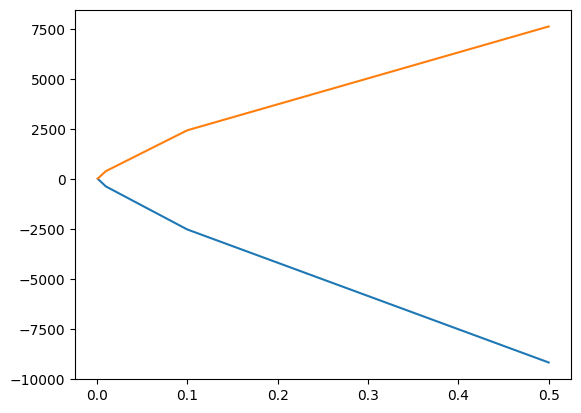

In [ ]:
plt.plot(data_spread_fra["SPREAD"].unique(), data_spread_fra.groupby("SPREAD")["MEAN_LONG"].mean());
plt.plot(data_spread_fra["SPREAD"].unique(), data_spread_fra.groupby("SPREAD")["MEAN_SHORT"].mean());

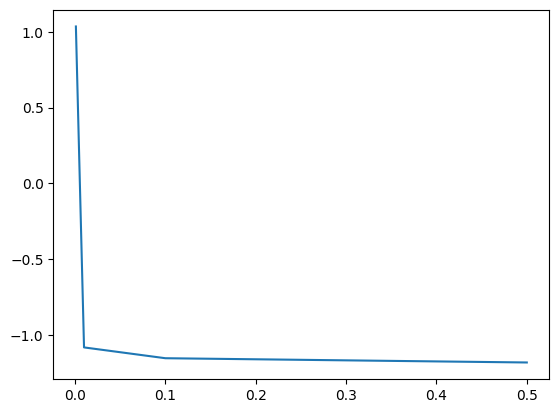

In [ ]:
plt.plot(data_spread_fra["SPREAD"].unique(), data_spread_fra.groupby("SPREAD")["LONG/SHORT"].mean());

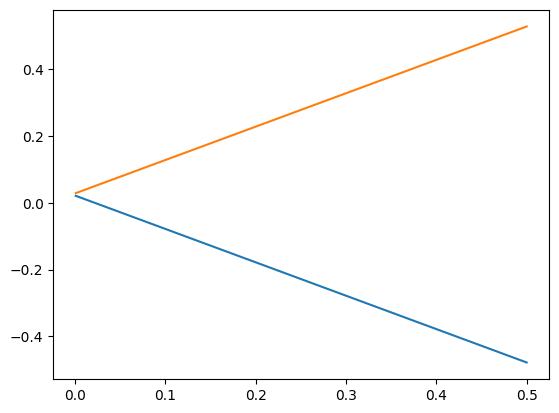

In [ ]:
plt.plot(data_spread_fra["SPREAD"].unique(), data_spread_fra.groupby("SPREAD")["MAX_PIPS_LONG"].mean());
plt.plot(data_spread_fra["SPREAD"].unique(), data_spread_fra.groupby("SPREAD")["MAX_PIPS_SHORT"].mean());

In [ ]:
(data_spread_fra["MEAN_PIPS_LONG"] == data_spread_fra["MAX_PIPS_LONG"]).any()

False

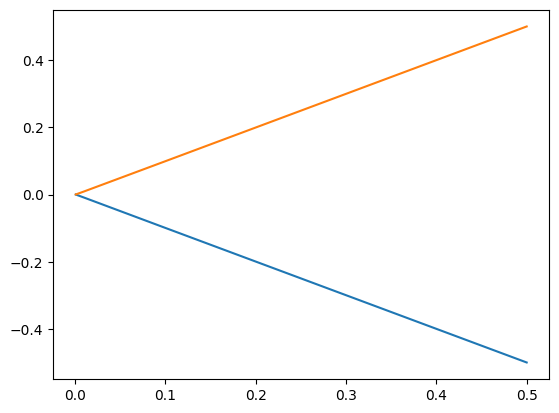

In [ ]:
plt.plot(data_spread_fra["SPREAD"].unique(), data_spread_fra.groupby("SPREAD")["MEAN_PIPS_LONG"].mean());
plt.plot(data_spread_fra["SPREAD"].unique(), data_spread_fra.groupby("SPREAD")["MEAN_PIPS_SHORT"].mean());

###No Spread

No spread "curve":

In [ ]:
for i in range(4):                
    print(f"---------computing {i} time--------")                 
    %run main.py --index_type NONFOREX --index FRA40 --nb_clusters {500} --spread 0

---------computing 0 time--------
#################PREPOCESSING DATA...#####################
643/643 [==============================] - 2s 3ms/step
#################PREPOCESSING DONE#####################
#################BUILDING THE CLASSIFIER...#####################


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

#################CLASSIFIER IS READY#####################
#################FILTERING CLUSTERS...#####################
#################FILTERATION DONE#####################
#################RUNNING BACKTEST...#####################
170/170 [==============================] - 0s 2ms/step
POSITIVE PIPS:  33
NEGATIVE PIPS:  42
TOTAL:  75
---------computing 1 time--------
#################PREPOCESSING DATA...#####################
643/643 [==============================] - 1s 2ms/step
#################PREPOCESSING DONE#####################
#################BUILDING THE CLASSIFIER...#####################


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

#################CLASSIFIER IS READY#####################
#################FILTERING CLUSTERS...#####################
#################FILTERATION DONE#####################
#################RUNNING BACKTEST...#####################
170/170 [==============================] - 0s 2ms/step
POSITIVE PIPS:  38
NEGATIVE PIPS:  42
TOTAL:  80
---------computing 2 time--------
#################PREPOCESSING DATA...#####################
643/643 [==============================] - 1s 2ms/step
#################PREPOCESSING DONE#####################
#################BUILDING THE CLASSIFIER...#####################


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: ignored

---------computing 3 time--------
#################PREPOCESSING DATA...#####################
643/643 [==============================] - 1s 2ms/step
#################PREPOCESSING DONE#####################
#################BUILDING THE CLASSIFIER...#####################


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

#################CLASSIFIER IS READY#####################
#################FILTERING CLUSTERS...#####################
#################FILTERATION DONE#####################
#################RUNNING BACKTEST...#####################
170/170 [==============================] - 0s 2ms/step
POSITIVE PIPS:  44
NEGATIVE PIPS:  58
TOTAL:  102


POSITIVE PIPS:  33
NEGATIVE PIPS:  42
TOTAL:  75

POSITIVE PIPS:  44
NEGATIVE PIPS:  58
TOTAL:  102

POSITIVE PIPS:  38
NEGATIVE PIPS:  42
TOTAL:  80

Therefore, formulas:

positive: PnL = equity[t]*(pip - spread)    
negative: PnL = - equity[t]*(pip + spread)

In [ ]:
import pandas as pd 

data_fra_no_spread = pd.read_csv('/content/gdrive/MyDrive/Data /no_spread_curve.csv', header=None)

columns = ["SYMBOL", "START_DATE", "END_DATE", "DATES", "SPREAD","LONG/SHORT","SUM_LONG","SUM_SHORT","MEAN_LONG","MEAN_SHORT","MAX_PIPS_LONG","MIN_PIPS_LONG","MEAN_PIPS_LONG","MAX_PIPS_SHORT","MIN_PIPS_SHORT","MEAN_PIPS_SHORT",  "N_CLUSTERS", "PREDICTIVE_CLUSTERS", "RETURN", "MIN_PIPS", "N_TRADE", "WIN_RATE", "MAX_DRAWDOWN", "SHARPE", "PATH", "BENCHMARK_RETURN"]
data_fra_no_spread.columns = columns
data_fra_no_spread.to_csv('/content/gdrive/MyDrive/Data /no_spread_curve.csv', index=False)

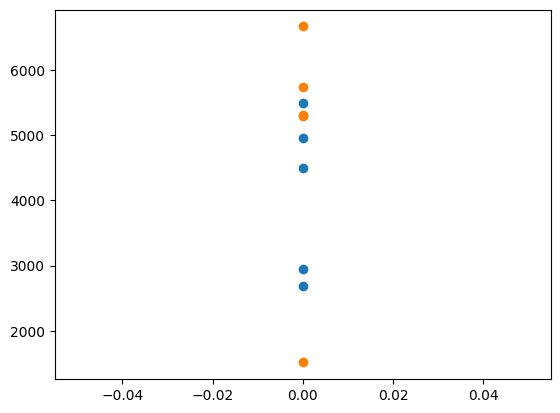

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt 

data_spread_fra = pd.read_csv('/content/gdrive/MyDrive/Data /no_spread_curve.csv')

# fig = go.Figure()

# fig.add_scatter(go.Scatter(x=data_spread_fra["SPREAD"],
#                             y=data_spread_fra["MEAN_LONG"],
#                             name="Long"))

# fig.add_trace(go.Scatter(x=data_spread_fra["SPREAD"],
#                             y=data_spread_fra["MEAN_SHORT"],
#                             name="Short"))


# fig.update_layout(
#     title="Dependence of average equity change on spread",
#     xaxis_title="Spread",
#     yaxis_title="Averaged mean PnL")

# fig.show()

plt.scatter(data_spread_fra["SPREAD"], data_spread_fra["SUM_LONG"])
plt.scatter(data_spread_fra["SPREAD"], -data_spread_fra["SUM_SHORT"])

In [ ]:
data_spread_fra["SUM_SHORT"]

0   -1511.749927
1   -5297.622979
2   -5313.930915
3   -5742.514218
4   -6672.391827
Name: SUM_SHORT, dtype: float64

Посмотреть на формулу расчета PIP. понять абсолютное значение там или нет. 

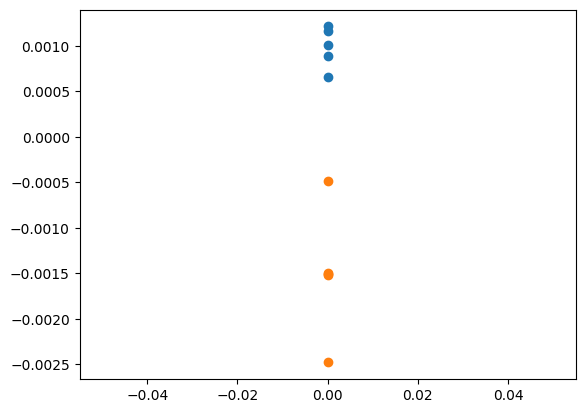

In [ ]:
plt.scatter(data_spread_fra["SPREAD"], data_spread_fra["MEAN_PIPS_LONG"])
plt.scatter(data_spread_fra["SPREAD"], data_spread_fra["MEAN_PIPS_SHORT"])

No spread data accumulation:

In [ ]:
for n_clust, t in zip([100], [1]):                         
  print(f"--------{n_clust}------------")
  for i in range(t):                
    print(f"---------computing {i} time--------")                  
    %run main.py --index_type NONFOREX --index FRA40 --nb_clusters {n_clust}

######No spread on train

In [ ]:
for i in range(4):                
    print(f"---------computing {i} time--------")                             
    %run main.py --index_type NONFOREX --index FRA40 --nb_clusters {500} --spread 0

---------computing 0 time--------
#################PREPOCESSING DATA...#####################
643/643 [==============================] - 1s 2ms/step
#################PREPOCESSING DONE#####################
#################BUILDING THE CLASSIFIER...#####################


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

#################CLASSIFIER IS READY#####################
#################FILTERING CLUSTERS...#####################
#################FILTERATION DONE#####################
#################RUNNING BACKTEST...#####################
643/643 [==============================] - 1s 2ms/step
POSITIVE PIPS:  151
NEGATIVE PIPS:  169
TOTAL:  320
---------computing 1 time--------
#################PREPOCESSING DATA...#####################
643/643 [==============================] - 1s 2ms/step
#################PREPOCESSING DONE#####################
#################BUILDING THE CLASSIFIER...#####################


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

#################CLASSIFIER IS READY#####################
#################FILTERING CLUSTERS...#####################
#################FILTERATION DONE#####################
#################RUNNING BACKTEST...#####################
643/643 [==============================] - 1s 2ms/step
POSITIVE PIPS:  165
NEGATIVE PIPS:  183
TOTAL:  348
---------computing 2 time--------
#################PREPOCESSING DATA...#####################
643/643 [==============================] - 1s 2ms/step
#################PREPOCESSING DONE#####################
#################BUILDING THE CLASSIFIER...#####################


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

#################CLASSIFIER IS READY#####################
#################FILTERING CLUSTERS...#####################
#################FILTERATION DONE#####################
#################RUNNING BACKTEST...#####################
643/643 [==============================] - 1s 2ms/step
POSITIVE PIPS:  144
NEGATIVE PIPS:  151
TOTAL:  295
---------computing 3 time--------
#################PREPOCESSING DATA...#####################
643/643 [==============================] - 2s 2ms/step
#################PREPOCESSING DONE#####################
#################BUILDING THE CLASSIFIER...#####################


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

#################CLASSIFIER IS READY#####################
#################FILTERING CLUSTERS...#####################
#################FILTERATION DONE#####################
#################RUNNING BACKTEST...#####################
643/643 [==============================] - 2s 2ms/step
POSITIVE PIPS:  149
NEGATIVE PIPS:  156
TOTAL:  305


## Simple stats accumulation part

In [ ]:
import pandas as pd 

data_fra = pd.read_csv('/content/gdrive/MyDrive/Data /FRA40_New_PNL.csv', header=None)

columns = ["SYMBOL", "START_DATE", "END_DATE", "DATES", "SPREAD", "N_CLUSTERS", "PREDICTIVE_CLUSTERS", "RETURN", "MIN_PIPS", "N_TRADE", "WIN_RATE", "MAX_DRAWDOWN", "SHARPE", "PATH", "BENCHMARK_RETURN"]
data_fra.columns = columns
data_fra.to_csv('/content/gdrive/MyDrive/Data /FRA40_New_PNL.csv', index=False)

In [ ]:
data_fra = pd.read_csv('/content/gdrive/MyDrive/Data /FRA40_New_PNL.csv', header=None)
times = 5 - data_fra.groupby(["N_CLUSTERS"]).size()
times

In [ ]:
for n_clust, t in zip([100], [1]):                         
  print(f"--------{n_clust}------------")
  for i in range(t):                
    print(f"---------computing {i} time--------")                  
    %run main.py --index_type NONFOREX --index FRA40 --nb_clusters {n_clust} 

In [ ]:
import pandas as pd             
             
df1 = pd.read_csv('/content/gdrive/MyDrive/Data /FRA40_500_700.csv', header=None)
df2 = pd.read_csv('/content/PSC-Pattern-Classification/data_analysis/FRA40.csv', header=None)
df3 = pd.read_csv('/content/PSC-Pattern-Classification/data_analysis/FRA40_200.csv', header=None)
df4 = pd.read_csv('/content/PSC-Pattern-Classification/data_analysis/FRA40_500.csv', header=None)
df5 = pd.read_csv('/content/PSC-Pattern-Classification/data_analysis/FRA40_nb_cl.csv', header=None)
df6 = pd.read_csv('/content/FRA40_400_500_700-4.csv', header=None)
frames = [df1, df2, df3, df4, df5, df6]
result = pd.concat(frames)

columns = ["SYMBOL", "START_DATE", "END_DATE", "DATES", "SPREAD", "N_CLUSTERS", "PREDICTIVE_CLUSTERS", "RETURN", "MIN_PIPS", "N_TRADE", "WIN_RATE", "MAX_DRAWDOWN", "SHARPE", "PATH", "BENCHMARK_RETURN"]
result.columns = columns

result.to_csv('/content/gdrive/MyDrive/Data /FRA40_result.csv', index=False)

## Generalization check 

In [ ]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('/content/PSC-Pattern-Classification/marketdata.db')
query = f"""SELECT * FROM FRA40"""
df = pd.read_sql(query, connection)
connection.close()

In [ ]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
df['date']

0         2010-01-04 07:00:00
1         2010-01-04 07:05:00
2         2010-01-04 07:10:00
3         2010-01-04 07:15:00
4         2010-01-04 07:20:00
                 ...         
485463    2021-07-19 19:35:00
485464    2021-07-19 19:40:00
485465    2021-07-19 19:45:00
485466    2021-07-19 19:50:00
485467    2021-07-19 19:55:00
Name: date, Length: 485468, dtype: object

In [ ]:
for n_clust, t in zip([1800, 2000], [0, 3]):                         
  print(f"--------{n_clust}------------")
  i = 0
  while i < t:                
    print(f"---------computing {i} time--------")                  
    %run main.py --index_type NONFOREX --index FRA40 --nb_clusters {n_clust} 

    with open('/content/PSC-Pattern-Classification/gen_chek_bool.txt', 'r') as f:
        if f.read() == 'True': 
          i += 1

In [ ]:
import pandas as pd 

df = pd.read_csv('/content/gdrive/MyDrive/Data /FRA40_Gen_check.csv', header=None)

columns = ["N_CLUSTERS", "Test_start", "Test_mid", "Test_end", "First_Return", "Second_Return"]
df.columns = columns

df.to_csv('/content/gdrive/MyDrive/Data /FRA40_Gen_check.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

gen_data = pd.read_csv('/content/gdrive/MyDrive/Data /FRA40_Gen_check.csv')

In [ ]:
gen_data['Difference'] = gen_data['Second_Return'] - gen_data['First_Return']
print(gen_data.groupby(['N_CLUSTERS'])['Difference'].mean())

fig = px.scatter(gen_data, x=gen_data["N_CLUSTERS"].unique(), y=gen_data.groupby(['N_CLUSTERS'])['Difference'].mean(), color=gen_data.groupby(['N_CLUSTERS'])['Difference'].max(), color_continuous_scale='Inferno_r')

fig.update_layout(
    title="Average return difference between the second and first runs for each number of clusters",
    xaxis_title="N_Clusters",
    yaxis_title="Average return difference",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="RebeccaPurple"
    ))
fig.layout.coloraxis.colorbar.title = 'Max Diff'


fig.show()

N_CLUSTERS
10      11.529883
25       0.674048
50       3.152198
100      0.634260
300     -0.109385
500     -0.224156
600      4.180461
1000    -1.226901
1200     8.550261
1500    -3.504606
1600    -3.046799
1800    -1.869267
2000    -2.842868
Name: Difference, dtype: float64


In [ ]:
fig = px.scatter(gen_data, x=gen_data["N_CLUSTERS"], y=gen_data['Difference'])
fig.update_layout(
    title="Return difference between the second and first runs for each number of clusters",
    xaxis_title="N_Clusters",
    yaxis_title="Return difference",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="RebeccaPurple"
    ))

fig.show()

In [ ]:
fig = px.scatter(data_fra, x="N_CLUSTERS", y="RETURN", color="SHARPE", title="Return by N_clusters with benchmark(green line) and mean returns (black line)")

fig.add_hline(y=data_fra["BENCHMARK_RETURN"][0], line_dash="dash", line_color="green")
fig.add_hrect(y0=data_fra["RETURN"].min()-10, y1=data_fra["BENCHMARK_RETURN"][0], line_width=0, fillcolor="red", opacity=0.1)
fig.add_trace(go.Scatter(x=[10,25,50,100,200,300,400,500,700,1500],
                            y=means_by_clusters_minus_bench,
                            mode="lines",
                            line=go.scatter.Line(color="black"),
                            showlegend=False))
fig.show()

## Analysis of FRA40 results

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#data_fra = pd.read_csv('/content/PSC-Pattern-Classification/data_analysis/FRA40_result.csv')
data_fra = pd.read_csv('/content/gdrive/MyDrive/Data /FRA40_result.csv')

In [ ]:
data_fra["RETURN"].describe()

count    264.000000
mean      -9.736272
std       19.782115
min      -65.361129
25%      -19.375276
50%      -10.800665
75%       -0.049245
max       75.945273
Name: RETURN, dtype: float64

In [ ]:
(data_fra["RETURN"] - data_fra["BENCHMARK_RETURN"]).describe()

count    264.000000
mean     -17.365885
std       19.782115
min      -72.990742
25%      -27.004889
50%      -18.430278
75%       -7.678859
max       68.315660
dtype: float64

In [ ]:
means_by_clusters = data_fra.groupby(["N_CLUSTERS"])["RETURN"].mean() 
means_by_clusters_minus_bench = means_by_clusters - data_fra["BENCHMARK_RETURN"][0]
print('Means of return - bench by:', means_by_clusters_minus_bench)

Means of return - bench by: N_CLUSTERS
10     -36.857353
25     -24.101791
50     -18.214415
100    -21.073094
200    -16.465533
300    -13.852037
400    -14.125752
500    -13.712920
600    -15.155826
700    -11.546597
1500    -5.919417
Name: RETURN, dtype: float64


In [ ]:
data_success = data_fra.copy()
data_success["RETURN"] = (data_fra["RETURN"] - data_fra["BENCHMARK_RETURN"]) > 0
data_by_clusters = data_success.groupby(["N_CLUSTERS"])["RETURN"].sum() / data_fra.groupby(["N_CLUSTERS"])["RETURN"].size()
data_by_clusters 

N_CLUSTERS
10      0.125000
25      0.000000
50      0.041667
100     0.000000
200     0.041667
300     0.125000
400     0.125000
500     0.291667
600     0.208333
700     0.208333
1500    0.333333
Name: RETURN, dtype: float64

In [ ]:
data_fra.columns

Index(['SYMBOL', 'START_DATE', 'END_DATE', 'DATES', 'SPREAD', 'N_CLUSTERS',
       'PREDICTIVE_CLUSTERS', 'RETURN', 'MIN_PIPS', 'N_TRADE', 'WIN_RATE',
       'MAX_DRAWDOWN', 'SHARPE', 'PATH', 'BENCHMARK_RETURN'],
      dtype='object')

In [ ]:
data_fra.groupby(["N_CLUSTERS"]).size()

N_CLUSTERS
10      24
25      24
50      24
100     24
200     24
300     24
400     24
500     24
600     24
700     24
1500    24
dtype: int64

In [ ]:
data_fra.groupby(["N_CLUSTERS"])["WIN_RATE"].agg(['min', 'max'])

,min,max
N_CLUSTERS,,
10,0.273973,0.544554
25,0.390909,0.520548
50,0.423810,0.527523
100,0.400000,0.500000
200,0.450450,0.528497
300,0.439394,0.545946
400,0.427746,0.598765
500,0.248366,0.655462
600,0.338129,0.633333


In [ ]:
fig = px.scatter(data_fra, x="N_CLUSTERS", y="RETURN", color="SHARPE", title="Return by N_clusters with benchmark(green line) and mean returns (black line)")

fig.add_hline(y=data_fra["BENCHMARK_RETURN"][0], line_dash="dash", line_color="green")
fig.add_hrect(y0=data_fra["RETURN"].min()-10, y1=data_fra["BENCHMARK_RETURN"][0], line_width=0, fillcolor="red", opacity=0.1)
fig.add_trace(go.Scatter(x=[10,25,50,100,200,300,400,500,700,1500],
                            y=means_by_clusters_minus_bench,
                            mode="lines",
                            line=go.scatter.Line(color="black"),
                            showlegend=False))
fig.show()

# New PnL FRA40

In [ ]:
data_fra_new_pnl = pd.read_csv('/content/gdrive/MyDrive/Data /FRA40_New_PNL.csv')

In [ ]:
fig = px.scatter(data_fra_new_pnl, x="N_CLUSTERS", y="RETURN", color="SHARPE", title="Return by N_clusters with benchmark(green line) and mean returns (black line)")

fig.add_hline(y=data_fra_new_pnl["BENCHMARK_RETURN"][0], line_dash="dash", line_color="green")
#fig.add_hrect(y0=data_fra["RETURN"].min()-10, y1=data_fra["BENCHMARK_RETURN"][0], line_width=0, fillcolor="red", opacity=0.1)
#fig.add_trace(go.Scatter(x=[10,25,50,100,200,300,400,500,700,1500],
#                            y=means_by_clusters_minus_bench,
#                           mode="lines",
#                            line=go.scatter.Line(color="black"),
#                            showlegend=False))
fig.show()

## Analysis for FOREX indices

In [ ]:
indices = ['CHFJPY','EURJPY','EURTRY', 'USDCAD','EURUSD','USDCHF','AUDUSD','USDCNH','USDJPY','BTCUSD', 'GBPCAD','ETHUSD','GBPCHF','USDNOK','CADCHF','EURAUD','GBPJPY','CADJPY' ,'EURCAD','GBPNZD','USDSEK', 'EURCHF','GBPUSD', 'TRYJPY', 'USDTRY', 'EURGBP', 'USDZAR']

In [ ]:
indices_usd = [i for i in indices if 'USD' in i]
print(f"Number of idices with USD: {len(indices_usd)}")
print(indices_usd)

Number of idices with USD: 13
['USDCAD', 'EURUSD', 'USDCHF', 'AUDUSD', 'USDCNH', 'USDJPY', 'BTCUSD', 'ETHUSD', 'USDNOK', 'USDSEK', 'GBPUSD', 'USDTRY', 'USDZAR']


In [ ]:
for indx in indices_usd[:2]:
  for i in range(1,3):
    %run main.py --index_type FOREX --index {indx} --nb_clusters {i*100}